# WeatherPy Analysis


# Observations:
# Temperatures are higher closer to the equator.
# There is no clear correlation between humidity and distance from equator.
# Cloudiness is higher farther away from the equator.

In [233]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import numpy as np
from citipy import citipy
from config import openweather_api_key

In [234]:
# Save config information.
api_key = openweather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="



In [235]:
weather_data = []
coordinates = []

lats = np.random.uniform(low=-90.000, high=90.000, size=20)
lngs = np.random.uniform(low=-180.000, high=180.000, size=20)

coordinates = tuple(zip(lats,lngs))

cities = []
city_name = []
dup_cities = set()
row = 1

for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

for city in cities:

    name = city.city_name
    
    if name not in dup_cities:
        city_name.append(name)
        dup_cities.add(name)
        print(row, name)
        row = row + 1



1 utica
2 mataura
3 chala
4 bambous virieux
5 norman wells
6 airai
7 nelson bay
8 houston
9 rikitea
10 port elizabeth
11 salinas
12 provideniya
13 hermanus
14 ushuaia
15 east london
16 novaya maka
17 arzamas
18 bluff
19 cherskiy
20 hasaki


In [236]:
# Loop through the list of cities and perform a request for data on each

for place in city_name:
    response = req.get(query_url + place).json()
    weather_data.append(response)


In [237]:
try:
    
    lat_data = [data.get("coord").get("lat") for data in weather_data]
    lon_data = [data.get("coord").get("lon") for data in weather_data]
    temp_data = [data.get("main").get("temp") for data in weather_data]
    hum_data = [data.get("main").get("humidity") for data in weather_data]
    cloud_data = [data.get("clouds").get("all") for data in weather_data]
    wind_data = [data.get("wind").get("speed") for data in weather_data]

except AttributeError:
    print("error")


In [238]:
# Create data frame


weather_data = {"City": city_name, "Latitude": lat_data, "Longitude":lon_data, 
                "Temperature": temp_data, "Humidity":hum_data, "Cloudiness":cloud_data,
               "Wind Speed":wind_data}

weather_df = pd.DataFrame(weather_data)

# Final DataFrame
# weather_df = weather_df[["City", "Latitude", "Longitude","Temperature","Humidity","Cloudiness","Wind Speed"]]


weather_df.head()

,City,Cloudiness,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,utica,90,87,43.10,-75.23,42.80,12.75
1,mataura,0,73,27.50,77.68,71.22,9.08
2,chala,0,63,-7.58,31.27,64.40,8.05
3,bambous virieux,75,78,-20.34,57.76,80.60,12.75
4,norman wells,75,75,65.28,-126.83,-14.81,2.37


In [239]:
# save Dataframe as csv
weather_df.to_csv("20_cities.csv", encoding="utf-8", index=False)

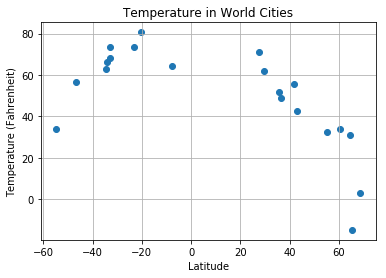

In [240]:
# Build a scatter plot Temperature vs Latitude
plt.scatter(weather_df["Latitude"], weather_data["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

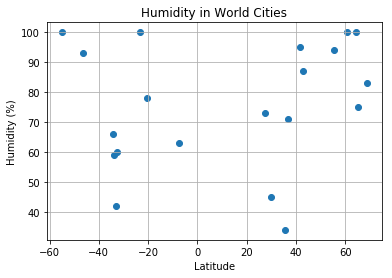

In [241]:
# Build a scatter plot Humidity vs Latitude
plt.scatter(weather_df["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

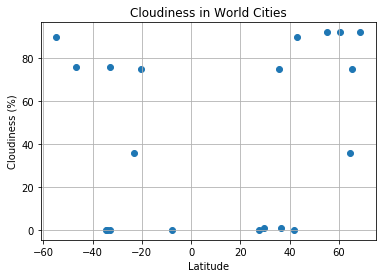

In [242]:
# Build a scatter plot Cloudiness vs Latitude
plt.scatter(weather_df["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

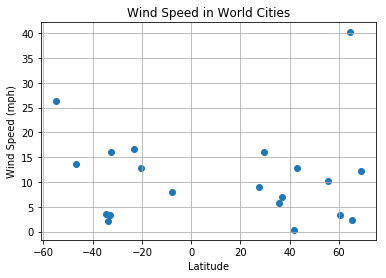

In [243]:
# Build a scatter plot Cloudiness vs Latitude
plt.scatter(weather_df["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()